In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Image processing library
import matplotlib.image as mpimg

So we're also going to say matplotlib.image and we're going to import this as mpimp, basically matplotlib image.

And this has some useful functions that can directly read in JPEG and PMG files and convert them into numpy arrays.

In [4]:
img_as_array = mpimg.imread('palm_trees.jpg') # Allow us read direct images like jpeg, png and convert them into numpy arrays.
img_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [5]:
img_as_array.shape

(1401, 934, 3)

So this image is a # dimensional object:-

1. Which has shape as (1401, 934, 3)
2. Which is :-        (Height, width, 3-color channels-RGB) / (H,W,C)
3. In which Height = 1401 pixels, Width = 935 pixels
4. And then the third element holds The 3 color channels - RGB - Reg,Green&Blue.

In [11]:
img_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

So the values that these array holds shows us the values of the pixels at that particular place. 

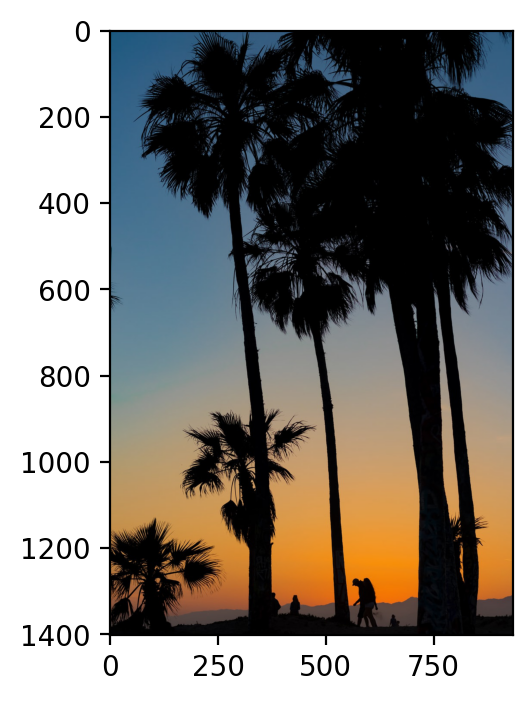

In [13]:
plt.figure(dpi=200)
plt.imshow(img_as_array);

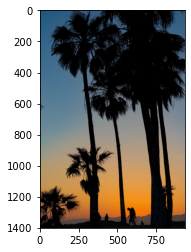

In [14]:
plt.imshow(img_as_array);

In [ ]:
# Own practice - not a part of K-Means

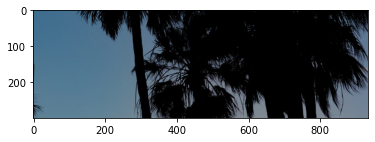

In [17]:
plt.imshow(img_as_array[50:1000][300:600])

In [29]:
test = img_as_array
test[50] = [0,255,0]
plt.imshow(test)

ValueError: assignment destination is read-only

## Using K-Means to quantize the colors

We right now have a three dimensional array that is, and something like height with and then color channels.

And we need to convert this to be two dimensional, as we previously discussed to be used in K-Means.

#### So essentially we need to convert this :- 
From (H,W,C) to (H*W,C)

We can do that using tuple unpacking.

In [30]:
img_as_array.shape

(1401, 934, 3)

In [31]:
#tuple unpacking
(h,w,c) = img_as_array.shape

In [32]:
h

1401

In [33]:
w

934

In [34]:
c

3

In [35]:
# Reshaping the original 3D array to 2D array
img_as_array2d = img_as_array.reshape(h*w,c)

So what we did here was we multiplied the rows into cols creating a shape as a 2D array, where sll the rows are essentially all the pixels in a single color channel.

In [36]:
img_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [42]:
img_as_array2d.shape

(1308534, 3)

So we just reformatted the original image into 2D form

In [40]:
len(img_as_array.shape)

3

In [41]:
len(img_as_array2d.shape)

2

In [48]:
img_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [45]:
img_as_array2d[0]

array([ 25,  89, 127], dtype=uint8)

In [46]:
img_as_array2d[1]

array([ 25,  89, 127], dtype=uint8)

In [47]:
img_as_array2d[1308533]

array([10, 10, 12], dtype=uint8)

In [49]:
### We just falttened the 3D image to a 2D where the rows are the pixels of the image and the columns are now color values of pixel in RGB. 

### Now We are ready to perform K-Means Clustering

In [50]:
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=6)

Cluster/K = 6 Is essentially saying I want to quantize this down to six kind of averaged out colors.

In [52]:
labels = model.fit_predict(img_as_array2d)

So we cannot pass in the original image because the image is in 3D and K-Means needs it in 2D format.

----
So the image is now 1401*934 = 1308534 pixels so the labels step above will take some time to run.


In [53]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [55]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

So as we gave n_clusters = 6 we have 6 different labels that KMeans returned to us.

In [56]:
# SO what we really want to know is what are the cluster centres

In [57]:
model.cluster_centers_

array([[  2.75599649,   2.57498121,   3.70000713],
       [191.17885134, 154.5272533 , 109.95523309],
       [ 71.01390661, 109.19748658, 137.64887954],
       [218.97345335, 135.5984951 ,  47.33849616],
       [ 67.25979522,  61.52529474,  61.97277973],
       [136.49890657, 143.66269893, 144.03751759]])

#### SO what is this?
So we have 6 different clusters/labels and for every cluster we have 3 different values. These are essentially the  six averaged out red, green, blue values of each of those clusters.

In [59]:
rgb_codes = model.cluster_centers_
rgb_codes

array([[  2.75599649,   2.57498121,   3.70000713],
       [191.17885134, 154.5272533 , 109.95523309],
       [ 71.01390661, 109.19748658, 137.64887954],
       [218.97345335, 135.5984951 ,  47.33849616],
       [ 67.25979522,  61.52529474,  61.97277973],
       [136.49890657, 143.66269893, 144.03751759]])

In [62]:
#Rounding those values
rgb_codes = rgb_codes.round(0)
rgb_codes

array([[  3.,   3.,   4.],
       [191., 155., 110.],
       [ 71., 109., 138.],
       [219., 136.,  47.],
       [ 67.,  62.,  62.],
       [136., 144., 144.]])

In [63]:
# Making them as integers
rgb_codes = rgb_codes.astype(int)
rgb_codes

array([[  3,   3,   4],
       [191, 155, 110],
       [ 71, 109, 138],
       [219, 136,  47],
       [ 67,  62,  62],
       [136, 144, 144]])

### Now we need to assign these RGB color codes.
Meaning we need to assign these cdoes back as an originar image so that we get the quantized image.

How do we do that?

Well, if we have the "rgb_codes" and I have ""labels, Then I know that my label's array is associated with these rgb_codes.

In [64]:
# That is we have
labels

array([2, 2, 2, ..., 0, 0, 0])

In [65]:
rgb_codes

array([[  3,   3,   4],
       [191, 155, 110],
       [ 71, 109, 138],
       [219, 136,  47],
       [ 67,  62,  62],
       [136, 144, 144]])

#### So label at rgb_codes[0] = labels[0] i.e., 2 is this color [  3,   3,   4].

In [66]:
# So to assign them we need to :-
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

Well, labels is essentially an index position, referring to a particular cluster center, which is an RGB code from the rgb_codes.

In [67]:
# Now it is in 2D shape we need to reshape it as 3D
np.reshape(rgb_codes[labels],(h,w,c))

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [68]:
# Our quantized image
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

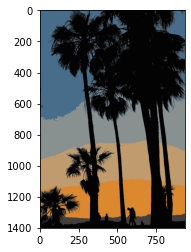

In [69]:
plt.imshow(quantized_image);

### Thus this is our quantized image.